In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as plt
import sklearn as sk


In [2]:
train = pd.read_csv('train .csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


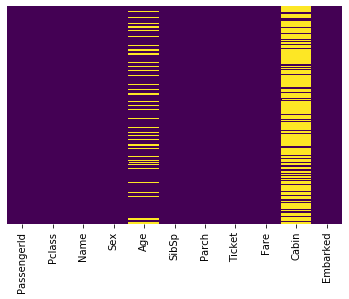

In [4]:
sb.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')



In [5]:
train.groupby('Pclass')['Age'].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [6]:
test.groupby('Pclass')['Age'].mean()



Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

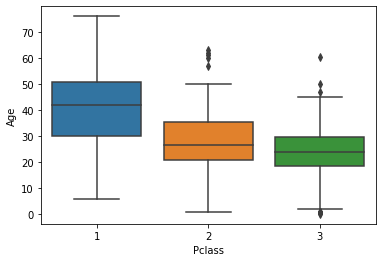

In [7]:
sb.boxplot(x='Pclass', y= 'Age', data=test)

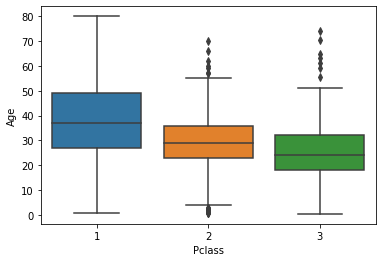

In [8]:
sb.boxplot(x='Pclass', y= 'Age', data=train)

In [9]:
def f_age(passenger):
    age = passenger [0]
    pclass = passenger [1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age 
    

In [10]:
train['Age'] = train[['Age', 'Pclass']].apply(f_age,axis=1)
test['Age'] = train[['Age', 'Pclass']].apply(f_age,axis=1)





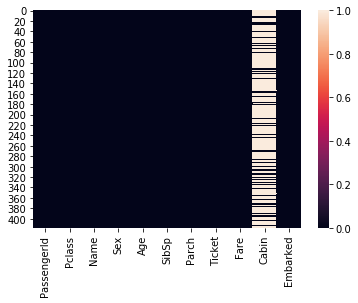

In [11]:
sb.heatmap(test.isnull())


In [12]:
train.drop('Cabin',axis=1,inplace=True)

In [13]:
test.drop('Cabin', axis = 1, inplace=True)

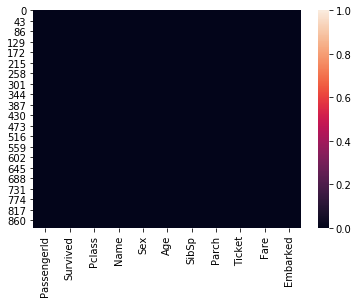

In [14]:
sb.heatmap(train.isnull())

In [15]:
gender = pd.get_dummies(train['Sex'], drop_first=True)
gender = pd.get_dummies(test['Sex'], drop_first=True)

In [16]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)


In [17]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1,inplace=True)
test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1,inplace=True)

In [21]:
train = pd.concat([train,gender,embark], axis=1)
test = pd.concat([train,gender,embark], axis=1)



In [22]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [23]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0,1
1,1,1,38.0,1,0,71.2833,0.0,0,0
2,1,3,26.0,0,0,7.9250,1.0,0,1
3,1,1,35.0,1,0,53.1000,1.0,0,1
4,0,3,35.0,0,0,8.0500,0.0,0,1


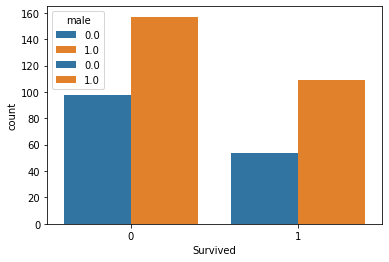

In [24]:
sb.countplot(x="Survived", hue="male", data=train)
sb.countplot(x="Survived", hue="male", data=train)

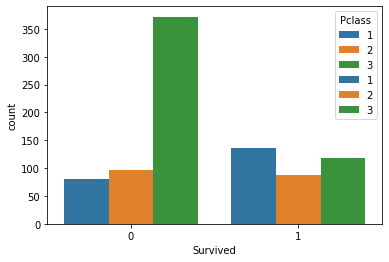

In [25]:
sb.countplot(x="Survived", hue="Pclass", data=train)
sb.countplot(x="Survived", hue="Pclass", data=test)

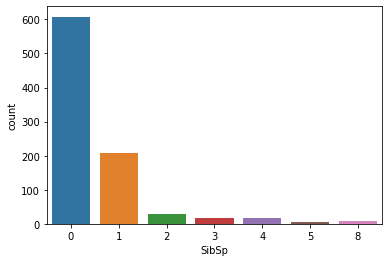

In [26]:
sb.countplot(x='SibSp', data=train)
sb.countplot(x='SibSp', data=test)

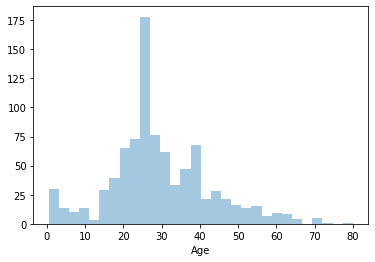

In [27]:
sb.distplot(train['Age'].dropna(), bins=30, kde = False)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.3)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined